<a href="https://colab.research.google.com/github/leonhardrobin/fh-ai-24/blob/main/AI_WS2425_Exercise_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# import a couple of libraries
import math
from collections import Counter
import random
print("import completed")


import completed


Create a "Fish" class with the properties length, brightness, and a text label describing which class (i.e., Salmon/Bass) it belongs to.

In [4]:
class Fish(object):
  def __init__(self,length,brightness,label):
    self.length=length
    self.brightness = brightness
    self.label = label

  def distanceTo(self,r):
    #Task1: the function should return the Euclidian distance between the object (i.e., "self") and a reference object r

    #return math.sqrt(math.pow(self.length - r.length, 2) + math.pow(self.brightness - r.brightness, 2))
    return math.dist((self.length, self.brightness), (r.length, r.brightness))


The KNN classifier class has 2 functions - a constructor that initializes an instance with an array of training data; and a classify function which returns the predicted class label based on the [n] nearest neighbours.

In [5]:
class KNN(object):
  def __init__(self,array):
    self.array = array

  def classify(self,fish,k):
    #Task2: return and print the result of the classification
    distances = []
    for i in self.array:
      distances.append([fish.distanceTo(i), i.label])

    distances.sort()
    nearest = distances[:k]
    nearest = Counter(item[1] for item in nearest)
    mostCommon = nearest.most_common(1)[0][0]

    #print(mostCommon) # commented out to reduce output of the nexts tasks
    return mostCommon

Some examples to test. We create a couple of fish with certain properties and class labels. Then, we instantiate the KNN classifier and try to classify a couple of unlabeled fish.

In [8]:

#Task3: Create a function that fills a new array ("pond") with 100 random fish, 50 of type "Salmon" and 50 of type "Bass". For both types,
# their properties i.e., length/brightness should be randomly generated but have an individual peak value. For example,
# "Salmons" have high length (5-10) and low brightness (0-6), while "Bass" have low length (0-6) but high brightness (5-10)
def randomFish():
    pond = []
    for i in range(50):
        pond.append(Fish(random.randint(5, 10), random.randint(0, 6), "Salmon"))
    for i in range(50):
        pond.append(Fish(random.randint(0, 6), random.randint(5, 10), "Bass"))
    return pond

pond = randomFish()

#Task4: Instantiate the KNN classifier with the 100 fish array and also create 5 fish instances with an empty label,
# which you want to fall into the one or other category. Classify them with K-values from 1 to 5 and print out the result

knn = KNN(pond)

for i in range(5):
    fish = Fish(random.randint(0, 10), random.randint(0, 10), "")
    print(knn.classify(fish, i + 1))


#Task5: Create 20 fish with a label ("test set"), which you want to fall into the one or other category. Classify them with K=3 and
#calculate the resulting accuracy (by comparing your predefined label with the classifier result)

salmon = [Fish(random.randint(5, 10), random.randint(0, 6), "Salmon") for i in range(10)]

bass = [Fish(random.randint(0, 6), random.randint(5, 10), "Bass") for i in range(10)]

testSet = salmon + bass
classification = [knn.classify(i, 3) for i in testSet]


correct = 0
for i in range(len(testSet)):
    if testSet[i].label == classification[i]:
        correct += 1

accuracy = correct / len(testSet)

print(accuracy)
print(classification)




Bass
Salmon
Bass
Bass
Salmon
1.0
['Salmon', 'Salmon', 'Salmon', 'Salmon', 'Salmon', 'Salmon', 'Salmon', 'Salmon', 'Salmon', 'Salmon', 'Bass', 'Bass', 'Bass', 'Bass', 'Bass', 'Bass', 'Bass', 'Bass', 'Bass', 'Bass']


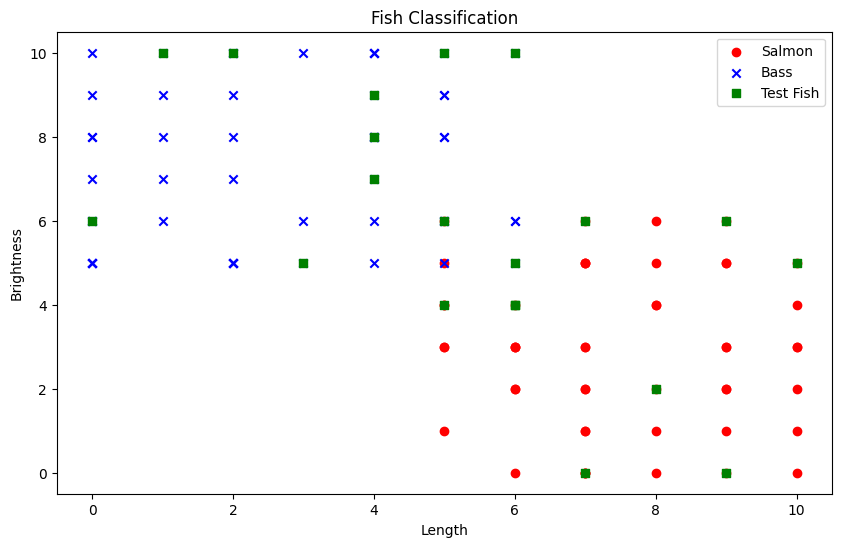

In [7]:
# prompt: plot the data

import matplotlib.pyplot as plt

# Assuming 'pond' and 'testSet' are defined as in the previous code

# Prepare data for plotting
salmon_lengths = [fish.length for fish in pond if fish.label == "Salmon"]
salmon_brightnesses = [fish.brightness for fish in pond if fish.label == "Salmon"]
bass_lengths = [fish.length for fish in pond if fish.label == "Bass"]
bass_brightnesses = [fish.brightness for fish in pond if fish.label == "Bass"]

test_lengths = [fish.length for fish in testSet]
test_brightnesses = [fish.brightness for fish in testSet]
test_labels = [fish.label for fish in testSet]

# Create the plot
plt.figure(figsize=(10, 6))
plt.scatter(salmon_lengths, salmon_brightnesses, label="Salmon", color="red", marker='o')
plt.scatter(bass_lengths, bass_brightnesses, label="Bass", color="blue", marker='x')
plt.scatter(test_lengths, test_brightnesses, label="Test Fish", color="green", marker='s')

# Add labels and title
plt.xlabel("Length")
plt.ylabel("Brightness")
plt.title("Fish Classification")
plt.legend()

# Show the plot
plt.show()